In [1]:
# Import own packages
from Project.GillespieSimulation import *

# Plot inside Jupyter Notebook
%matplotlib inline

# auto reload imports after changes
%load_ext autoreload
%autoreload 2

2024-12-02 12:57:27,571 - INFO - Starting the simulation script...
2024-12-02 12:57:28,042 - INFO - Successfully loaded all required libraries.


## Gillespie Simulation 

### Goal of this project
Write the code for a Gillespie simulation of the miRNA-TF-target protein FFL.

Variable definitions:
- $T$ is the TF mRNA
- $q$ is the transcription factor protein, 
- $s$ is the miRNA, 
- $r$ is the target mRNA, 
- $p$ is the target protein.
- $c$ is the complex of miRNA and mRNA.

Project version:
- $TF_{mRNA}$ transcription and decay: $\emptyset \xrightleftharpoons[\mu_T]{\alpha_T} TF_{mRNA}$
- $TF_{mRNA}$ translation and decay: $TF_{mRNA} \xrightarrow{\pi_T} TF_{protein} \xrightarrow{\mu_Q} \emptyset$
- miRNA production at rate $\alpha_S(q) = \alpha_S \frac{q}{q+K_S}$
- miRNA production and decay: $\emptyset \xrightleftharpoons[\mu_S]{\alpha_S(q)} miRNA$
- target mRNA transcription at rate $\alpha_R(Q) = \alpha_R \frac{q}{q+K_R}$
- Target mRNA transcription and decay: $\emptyset \xrightleftharpoons[\mu_R]{\alpha_R(q)} mRNA$
- Target protein translation and decay: $mRNA \xrightarrow{\pi_R} Protein \xrightarrow{\mu_R} \emptyset$
- miRNA-mediated mRNA degradation: 
  $miRNA + mRNA \xrightarrow{\beta} RNA_{complex}\xrightarrow{\mu_C} miRNA$

#### Define System

In [4]:
# Set the random number seed for reproducibility
np.random.seed(1)

init_state_fname = r"states/init_state.yaml"
start_state = State(init_state_fname)
o = start_state.print()

2024-12-02 12:58:27,960 - INFO - Starting the simulation script...
2024-12-02 12:58:27,960 - INFO - Successfully loaded all required libraries.


2024-12-02 12:58:28,034 - INFO - Initializing state from file: states/init_state.yaml
2024-12-02 12:58:28,036 - INFO - State initialization completed successfully.


------------------------
State(t=0)
-> TF_mRNA: 0
-> TF_protein: 0
-> miRNA: 0
-> mRNA: 0
-> protein: 0
-> complex: 0



In [5]:
start_state.print(full=True)

------------------------
State(t=0)
- time: 0
- TF_mRNA:
   - count: 0
   - translation_rate: 0.04
   - decay_rate: 0.006
   - transcription_rate: 0.06
   - transcription_rate_constant: True
- TF_protein:
   - count: 0
   - decay_rate: 0.002
- miRNA:
   - count: 0
   - transcription_rate: 0.5
   - decay_rate: 0.006
   - k: 200
- mRNA:
   - count: 0
   - translation_rate: 0.04
   - transcription_rate: 0.8
   - decay_rate: 0.006
   - k: 200
- protein:
   - count: 0
   - decay_rate: 0.002
- complex:
   - count: 0
   - molecules_per_complex: [1, 1]
   - formation_rate: 0.1
   - degradation_rate: 0.1



'------------------------\nState(t=0)\n- time: 0\n- TF_mRNA:\n   - count: 0\n   - translation_rate: 0.04\n   - decay_rate: 0.006\n   - transcription_rate: 0.06\n   - transcription_rate_constant: True\n- TF_protein:\n   - count: 0\n   - decay_rate: 0.002\n- miRNA:\n   - count: 0\n   - transcription_rate: 0.5\n   - decay_rate: 0.006\n   - k: 200\n- mRNA:\n   - count: 0\n   - translation_rate: 0.04\n   - transcription_rate: 0.8\n   - decay_rate: 0.006\n   - k: 200\n- protein:\n   - count: 0\n   - decay_rate: 0.002\n- complex:\n   - count: 0\n   - molecules_per_complex: [1, 1]\n   - formation_rate: 0.1\n   - degradation_rate: 0.1\n'

#### Run Simulation

2024-12-02 13:55:40,588 - INFO - Initializing state from file: C:\Users\mauls\My Drive\Dokumente\Studium\Dr\Lectures\43513-01---Programming-for-Life-Sciences---4KP\Project\states\init_state.yaml
2024-12-02 13:55:40,591 - INFO - State initialization completed successfully.
2024-12-02 13:55:40,592 - INFO - Starting simulation: 3
            trajectories, 30000 steps each.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|██████████| 3/3 [00:24<00:00,  8.11s/it]
2024-12-02 13:56:04,911 - INFO - Saving results to C:\Users\mauls\My Drive\Dokumente\Studium\Dr\Lectures\43513-01---Programming-for-Life-Sciences---4KP\Project\output\molecule_counts_30001_3.npy
2024-12-02 13:56:04,914 - INFO - Results saved successfully.


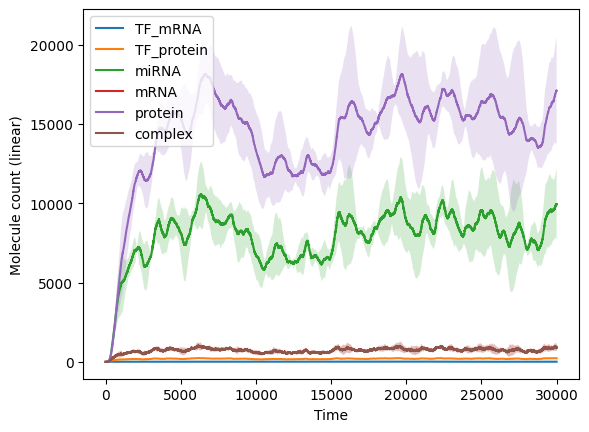

In [2]:
# Import own packages
from Project.GillespieSimulation import *
import numpy as np

# Plot inside Jupyter Notebook
%matplotlib inline

# auto reload imports after changes
%load_ext autoreload
%autoreload 2

# Set the random number seed for reproducibility
np.random.seed(1)

# Main simulation
simulator = StateMachine()
results = simulator.run(steps=30000, trajectories=3)
simulator.plot()

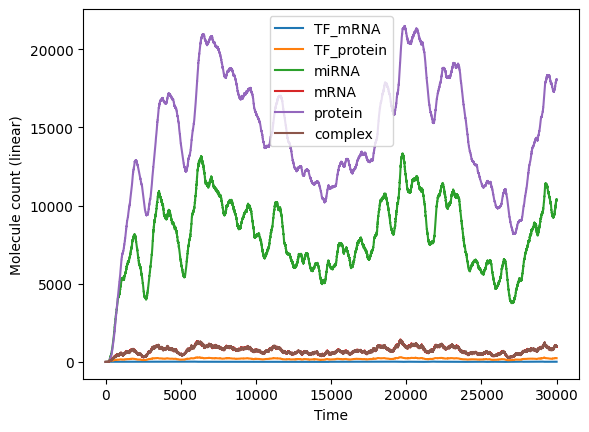

In [7]:
# plot single random example
simulator.plot(example=True)

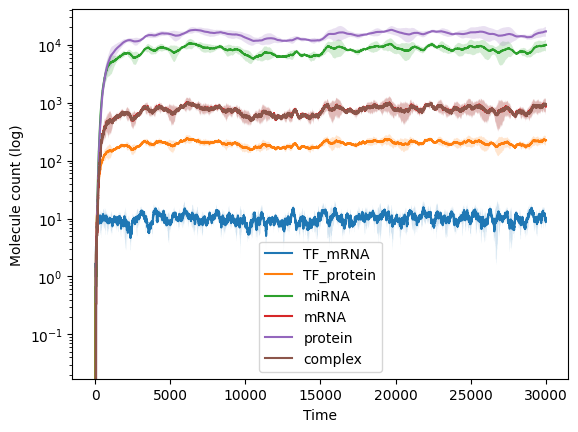

In [8]:
simulator.plot(scale="log")